In [4]:
import io
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set width and height
plt.rcParams["figure.figsize"] = (14.0, 8.0)

CSV_URL = "https://www.kiel.de/opendata/kiel_transport_verkehr_hafen_passagiere_insgesamt.csv"

In [5]:
# Fetch data
csv_data = requests.get(CSV_URL).content

df = pd.read_csv(io.StringIO(csv_data.decode("utf-8")), sep=";")
print(df.head(3))
print(df.tail(3))

    Land Stadt          Kategorie     Merkmal  Jahr im Faehrverkehr  \
0  de-sh  Kiel  transport_verkehr  Passagiere  1988       1.425.427   
1  de-sh  Kiel  transport_verkehr  Passagiere  1989       1.650.365   
2  de-sh  Kiel  transport_verkehr  Passagiere  1990       1.758.481   

   im Kreuzfahrverkehr  
0              433.514  
1              435.610  
2              460.218  
     Land Stadt          Kategorie     Merkmal  Jahr im Faehrverkehr  \
29  de-sh  Kiel  transport_verkehr  Passagiere  2017       1.603.483   
30  de-sh  Kiel  transport_verkehr  Passagiere  2018       1.607.029   
31  de-sh  Kiel  transport_verkehr  Passagiere  2019       1.588.467   

    im Kreuzfahrverkehr  
29              513.906  
30              598.672  
31              803.061  


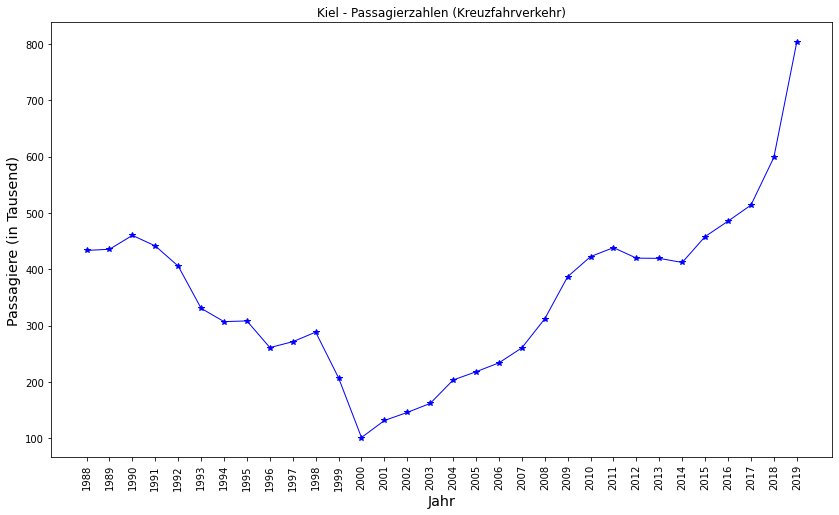

In [6]:
# Create a subplot
fig, ax = plt.subplots()

# Drop NA values
df_cleaned = df.dropna(how="all")

# Unsigned integer (0 to 65535)
df_years = df_cleaned['Jahr'].astype(np.uint16)

x = df_years.values
y = df_cleaned['im Kreuzfahrverkehr'].values

# Set title and x/y label
plt.title("Kiel - Passagierzahlen (Kreuzfahrverkehr)")
plt.ylabel("Passagiere (in Tausend)", size="x-large")
plt.xlabel("Jahr", size="x-large")

# Plot data
plt.plot(y, "*-", markersize=6, linewidth=1, color="b")

ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation="vertical")

plt.show()